#Import required libraries

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)

**Exploratory Data Analysis (EDA)**

#Check top five records

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Check bottom five records

In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


#Check data type of features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#Analyse Statistical Data(discriptive Analysis)

In [ ]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


#check name of columns to understand the features

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#data is huge as it is having 541909 rows and 8 columns

In [ ]:
data.shape

(541909, 8)

#Check whether data have null values or no,This data have null values so it is important to handle them

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#check whether dataset have duplicate values or not,my dataset have duplicate values so it need to be handled

In [ ]:
data.duplicated().sum()

5268

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#Check unique values of features

In [ ]:
data["InvoiceNo"].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [ ]:
data["StockCode"].unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

**unique value of StockCode contains alphanumeric values**

In [ ]:
data["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
data["Quantity"].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [ ]:
data["InvoiceDate"].unique()

<DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
 '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
 '2011-12-09 12:50:00']
Length: 23260, dtype: datetime64[ns]

In [ ]:
data["UnitPrice"].unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

In [ ]:
data["CustomerID"].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [ ]:
data["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

# Data Preprocessing
# Drop rows with missing CustomerID

In [ ]:
data = data.dropna(subset=['CustomerID'])


# Convert CustomerID to string

In [ ]:
data['CustomerID'] = data['CustomerID'].astype(str)


# Convert InvoiceDate to datetime

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Add a new column for total price


In [ ]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Drop rows with negative or zero quantity


In [ ]:
data = data[data['Quantity'] > 0]

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
data['CustomerID'][0]

'17850.0'

**Exploratory Data Analysis (EDA) and visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of TotalPrice

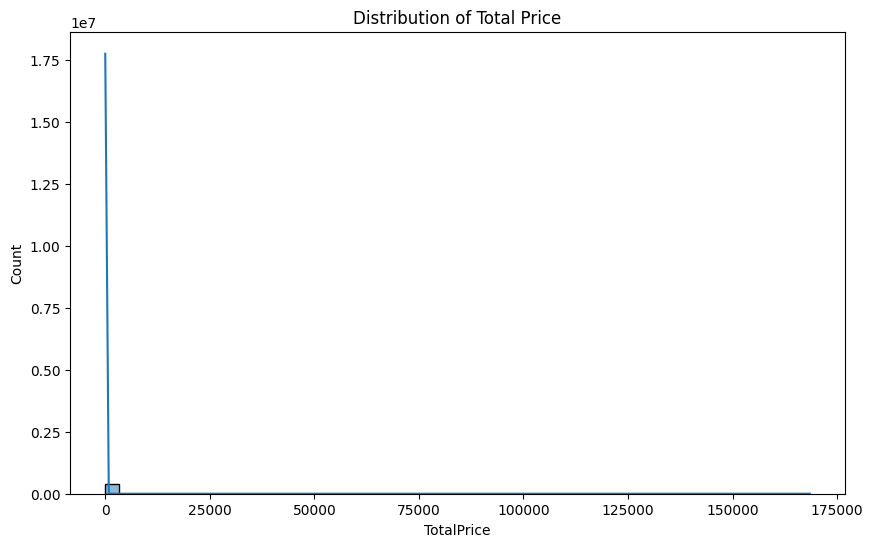

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Total Price')
plt.show()


# Plot the top 10 products by quantity sold


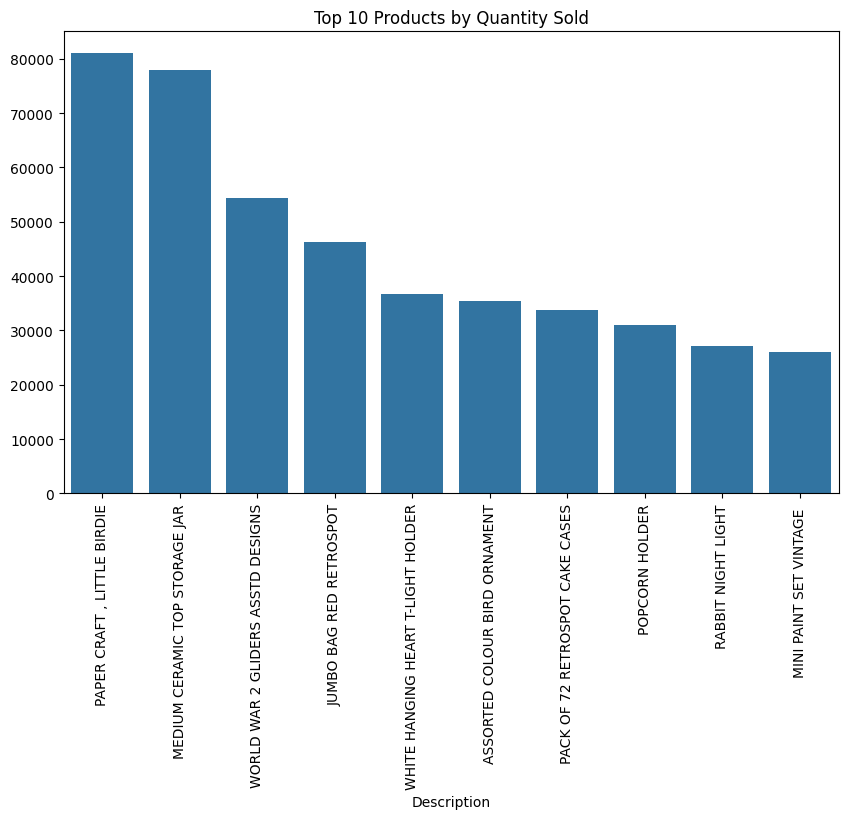

In [ ]:
top_products = data.groupby('Description')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=90)
plt.show()

**Feature Engineering**

In [ ]:
# Reference date for recency calculation
reference_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calculate Recency, Frequency, and Monetary value for each customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Normalize the RFM values
rfm['Recency'] = (rfm['Recency'] - rfm['Recency'].min()) / (rfm['Recency'].max() - rfm['Recency'].min())
rfm['Frequency'] = (rfm['Frequency'] - rfm['Frequency'].min()) / (rfm['Frequency'].max() - rfm['Frequency'].min())
rfm['Monetary'] = (rfm['Monetary'] - rfm['Monetary'].min()) / (rfm['Monetary'].max() - rfm['Monetary'].min())


#Model Training and  Predict Customer Return Likelihood

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a target variable for customer return likelihood (1 if returned, 0 otherwise)

In [ ]:
data['Returned'] = data['InvoiceDate'].apply(lambda x: 1 if x > reference_date else 0)

# Merge the target variable with RFM dataframe

In [ ]:
rfm = rfm.merge(data[['CustomerID', 'Returned']].drop_duplicates(), on='CustomerID')


# Split the data into training and test sets

In [ ]:
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Returned']

#Train test split for training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make predictions

In [ ]:
y_pred = clf.predict(X_test)

# Evaluate the model

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[868]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



**Predict Product Repurchase**

# Create a dataset for product repurchase prediction

In [ ]:
product_data = data.groupby(['CustomerID', 'StockCode']).agg({
    'Quantity': 'sum',
    'InvoiceDate': 'max'
}).reset_index()

# Ensure StockCode is a string
product_data['StockCode'] = product_data['StockCode'].astype(str)


# Define a target variable for product repurchase (1 if repurchased, 0 otherwise)

In [ ]:
product_data['Repurchased'] = product_data.duplicated(subset=['CustomerID', 'StockCode'], keep='first').astype(int)


#do the label encoding

In [ ]:
le = LabelEncoder()
product_data['StockCode'] = le.fit_transform(product_data['StockCode'])

# Split the data into training and test sets

In [ ]:
X = product_data[['CustomerID', 'StockCode', 'Quantity']]
y = product_data['Repurchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model traing using RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Mdel predictions and model evalution

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53361]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53361

    accuracy                           1.00     53361
   macro avg       1.00      1.00      1.00     53361
weighted avg       1.00      1.00      1.00     53361



**Product Recommendation**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
user_item_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)
similarity_matrix = cosine_similarity(user_item_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_products(customer_id, num_recommendations=5):
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).index[1:]
    recommended_products = []
    for similar_customer in similar_customers:
        products = user_item_matrix.loc[similar_customer]
        top_products = products[products > 0].index.tolist()
        recommended_products.extend(top_products)
        if len(recommended_products) >= num_recommendations:
            break
    return recommended_products[:num_recommendations]

customer_id = data['CustomerID'][0]
recommended_products = recommend_products(customer_id)
print("Recommended Products:", recommended_products)





Recommended Products: [22168, 22170, 22171, 40003, 71038]


#USING MODULAR CODING

**Import Required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

**Data Loading and Preprocessing**

In [ ]:
def load_and_preprocess_data(url):
    data = pd.read_excel(url)
    data = data.dropna(subset=['CustomerID'])
    data['CustomerID'] = data['CustomerID'].astype(str)
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
    data = data[data['Quantity'] > 0]
    return data

** Exploratory Data Analysis (EDA)**

In [ ]:
def plot_data_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['TotalPrice'], bins=50, kde=True)
    plt.title('Distribution of Total Price')
    plt.show()

    top_products = data.groupby('Description')['Quantity'].sum().nlargest(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_products.index, y=top_products.values)
    plt.title('Top 10 Products by Quantity Sold')
    plt.xticks(rotation=90)
    plt.show()


**Feature Engineering**

In [ ]:
def create_rfm_features(data):
    reference_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)
    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (reference_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'TotalPrice': 'sum'
    }).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

    rfm['Recency'] = (rfm['Recency'] - rfm['Recency'].min()) / (rfm['Recency'].max() - rfm['Recency'].min())
    rfm['Frequency'] = (rfm['Frequency'] - rfm['Frequency'].min()) / (rfm['Frequency'].max() - rfm['Frequency'].min())
    rfm['Monetary'] = (rfm['Monetary'] - rfm['Monetary'].min()) / (rfm['Monetary'].max() - rfm['Monetary'].min())
    return rfm


**Model Development(Predict Customer Return Likelihood)**

In [ ]:
def predict_customer_return(data, rfm):
    data['Returned'] = data['InvoiceDate'].apply(lambda x: 1 if x > data['InvoiceDate'].max() + pd.DateOffset(days=1) else 0)
    rfm = rfm.merge(data[['CustomerID', 'Returned']].drop_duplicates(), on='CustomerID')

    X = rfm[['Recency', 'Frequency', 'Monetary']]
    y = rfm['Returned']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


**Predict Product Repurchase**

In [ ]:
def predict_product_repurchase(data):
    product_data = data.groupby(['CustomerID', 'StockCode']).agg({
        'Quantity': 'sum',
        'InvoiceDate': 'max'
    }).reset_index()

    product_data['StockCode'] = product_data['StockCode'].astype(str)
    product_data['Repurchased'] = product_data.duplicated(subset=['CustomerID', 'StockCode'], keep='first').astype(int)

    le = LabelEncoder()
    product_data['StockCode'] = le.fit_transform(product_data['StockCode'])

    X = product_data[['CustomerID', 'StockCode', 'Quantity']]
    y = product_data['Repurchased']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


**Product Recommendation**

In [ ]:
def create_user_item_matrix(data):
    return data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)

def calculate_similarity(user_item_matrix):
    similarity_matrix = cosine_similarity(user_item_matrix)
    return pd.DataFrame(similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_products(similarity_df, user_item_matrix, customer_id, num_recommendations=5):
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).index[1:]
    recommended_products = []
    for similar_customer in similar_customers:
        products = user_item_matrix.loc[similar_customer]
        top_products = products[products > 0].index.tolist()
        recommended_products.extend(top_products)
        if len(recommended_products) >= num_recommendations:
            break
    return recommended_products[:num_recommendations]


**main function to call the methods and attributes**



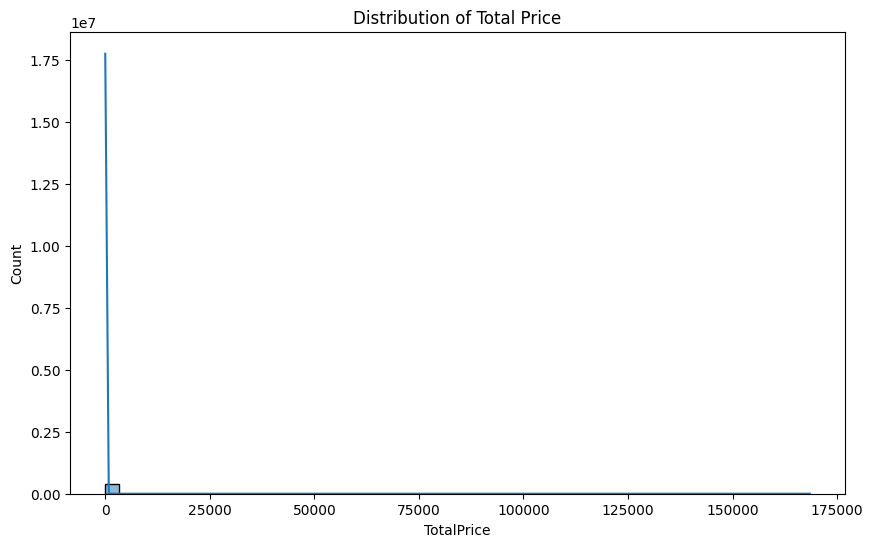

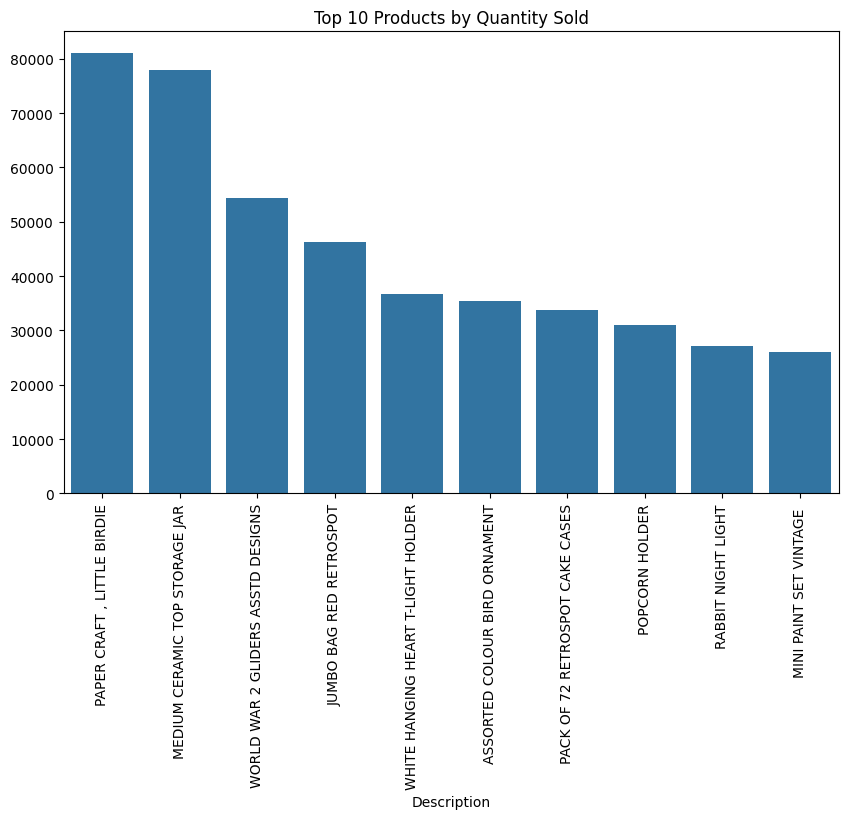

Predicting Customer Return Likelihood...
[[868]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868

Predicting Product Repurchase...
[[53361]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53361

    accuracy                           1.00     53361
   macro avg       1.00      1.00      1.00     53361
weighted avg       1.00      1.00      1.00     53361



IndexError: list index out of range

In [ ]:
def main():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
    data = load_and_preprocess_data(url)

    plot_data_distribution(data)

    rfm = create_rfm_features(data)

    print("Predicting Customer Return Likelihood...")
    predict_customer_return(data, rfm)

    print("Predicting Product Repurchase...")
    predict_product_repurchase(data)

    user_item_matrix = create_user_item_matrix(data)
    similarity_df = calculate_similarity(user_item_matrix)

    customer_id = ['CustomerID'][2]
    recommended_products = recommend_products(similarity_df, user_item_matrix, customer_id)
    print("Recommended Products for Customer", customer_id, ":", recommended_products)

if __name__ == "__main__":
    main()
